# Exploring the distribution of lengths in some specific WMT22 language dataset

In [ ]:
import matplotlib.pyplot as plt
from pathlib import Path
from tqdm import tqdm
import numpy as np
from collections import Counter


In [ ]:

# all = ["en_de", "en_es", "en_fr", "en_it", "en_pt", "en_ru"]
LANGUAGE_PAIRS = ["en_de", "en_es", "en_fr", "en_it", "en_pt", "en_ru"]

SAVE_IMAGES_PATH = Path("temp_images")
SAVE_IMAGES_PATH.mkdir(exist_ok=True, parents=True)

In [4]:
def get_pair_info(language_pair: str):
    print("Processing language pair:", language_pair)
    data_dir = Path(f"../data/wmt22/{language_pair}")
    source_lang, target_lang = language_pair.split("_")
    
    # filename format: (id)_(lang).txt
    # filter entries that don't have a translation
    ids = [doc.stem.split("_")[0] for doc in data_dir.glob("*.txt")]
    ids = [idx for idx, count in Counter(ids).items() if count == 2]
    source_docs = sorted(data_dir.glob(f"*_{source_lang}.txt"))
    source_docs = [doc for doc in source_docs if doc.stem.split("_")[0] in ids]
    target_docs = sorted(data_dir.glob(f"*_{target_lang}.txt"))
    target_docs = [doc for doc in target_docs if doc.stem.split("_")[0] in ids]
    assert len(source_docs) == len(target_docs)

    print(f"{language_pair}: {len(source_docs)} document pairs")

    # read in the documents and compute lengths
    source_lengths = []
    target_lengths = []
    for src_file, tgt_file in tqdm(zip(source_docs, target_docs), total=len(source_docs)):
        with open(src_file, "r", encoding="utf-8") as f:
            src_text = f.read()
            source_lengths.append(len(src_text.split()))

        with open(tgt_file, "r", encoding="utf-8") as f:
            tgt_text = f.read()
            target_lengths.append(len(tgt_text.split()))

    assert len(source_lengths) == len(target_lengths)

    # dataset size
    for cap in [300, 400, 500]:
    # Count sentence pairs where BOTH source and target lengths are <= cap
        capped_pairs = sum(
            1 for s, t in zip(source_lengths, target_lengths)
            if s <= cap and t <= cap
        )
        percentage = (capped_pairs / len(source_lengths)) * 100
        print(f"Percentage of sentence pairs with lengths <= {cap}: {percentage:.2f}%")
    
    # print stats
    print(f"Max source length: {max(source_lengths)}")
    print(f"Max target length: {max(target_lengths)}")
    print(f"Min source length: {min(source_lengths)}")
    print(f"Min target length: {min(target_lengths)}")
    print(f"99th percentile source length: {np.percentile(source_lengths, 99)}")
    print(f"99th percentile target length: {np.percentile(target_lengths, 99)}")
    print(f"Mean source length: {np.mean(source_lengths):.2f} (std: {np.std(source_lengths):.2f})")
    print(f"Mean target length: {np.mean(target_lengths):.2f} (std: {np.std(target_lengths):.2f})")

    # filter all sizes x <= 400
    source_lengths = [l for l in source_lengths if l <= 400]
    target_lengths = [l for l in target_lengths if l <= 400]

    # plot histograms
    plt.figure(dpi=150)
    bins = np.linspace(0, max(max(source_lengths), max(target_lengths)), 50)

    plt.hist(source_lengths, bins=bins, color="blue", alpha=0.6, label=f"Source ({source_lang})")
    plt.hist(target_lengths, bins=bins, color="green", alpha=0.6, label=f"Target ({target_lang})")

    plt.title(f"Abstract lengths for {language_pair}")
    plt.xlabel("Length (words)")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.gca().set_axisbelow(True)
    plt.savefig(SAVE_IMAGES_PATH / f"{language_pair}_lengths_histogram.png")
    plt.show()


  0%|          | 0/6 [00:00<?, ?it/s]

Processing language pair: en_de
en_de: 11187 document pairs


100%|██████████| 11187/11187 [00:14<00:00, 747.10it/s]


Percentage of sentence pairs with lengths <= 300: 89.61%
Percentage of sentence pairs with lengths <= 400: 98.61%
Percentage of sentence pairs with lengths <= 500: 99.72%
Max source length: 822
Max target length: 936
Min source length: 10
Min target length: 12
99th percentile source length: 417.1399999999994
99th percentile target length: 368.0
Mean source length: 196.86 (std: 82.68)
Mean target length: 179.23 (std: 77.25)


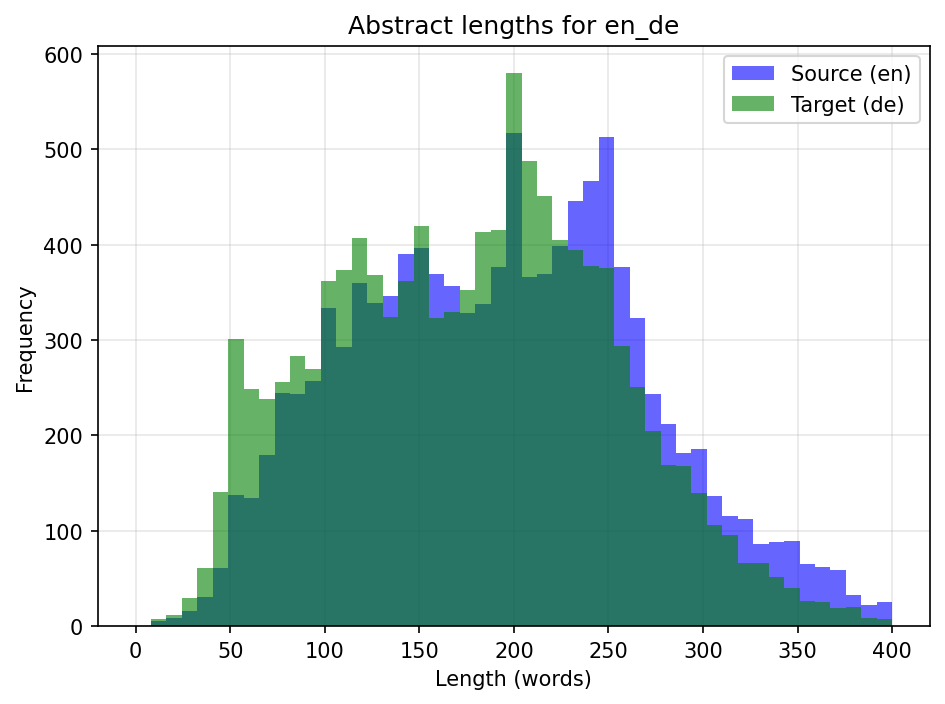

 17%|█▋        | 1/6 [00:19<01:38, 19.69s/it]

Processing language pair: en_es
en_es: 18571 document pairs


100%|██████████| 18571/18571 [00:23<00:00, 786.84it/s]


Percentage of sentence pairs with lengths <= 300: 84.56%
Percentage of sentence pairs with lengths <= 400: 98.12%
Percentage of sentence pairs with lengths <= 500: 99.52%
Max source length: 1074
Max target length: 1449
Min source length: 15
Min target length: 7
99th percentile source length: 356.2999999999993
99th percentile target length: 437.0
Mean source length: 198.78 (std: 63.61)
Mean target length: 230.31 (std: 80.79)


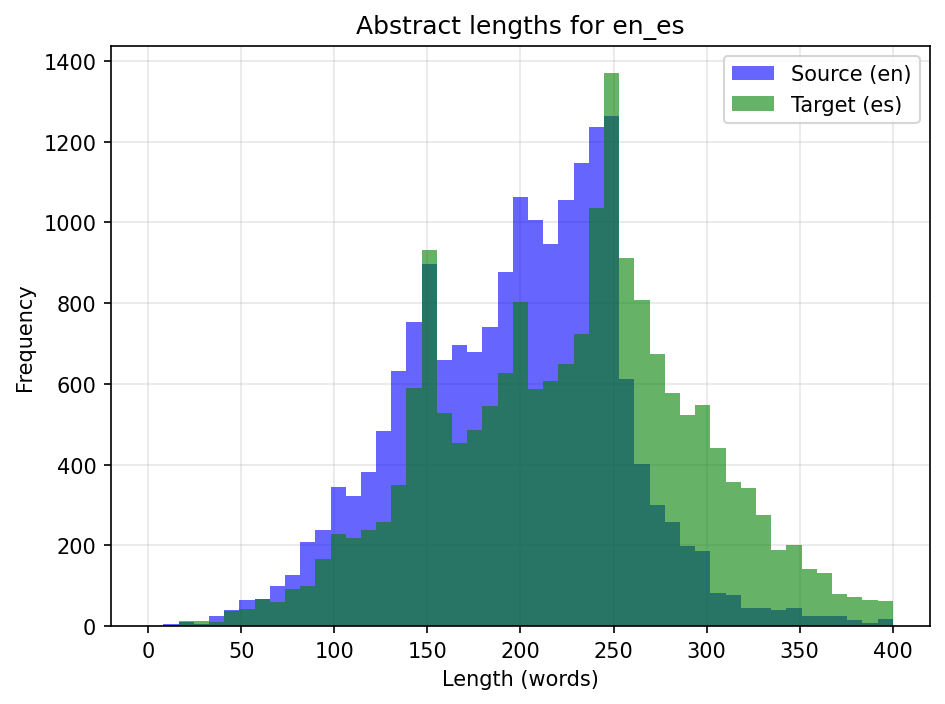

 33%|███▎      | 2/6 [00:51<01:46, 26.66s/it]

Processing language pair: en_fr
en_fr: 13029 document pairs


100%|██████████| 13029/13029 [00:17<00:00, 765.91it/s]


Percentage of sentence pairs with lengths <= 300: 70.92%
Percentage of sentence pairs with lengths <= 400: 94.41%
Percentage of sentence pairs with lengths <= 500: 98.50%
Max source length: 1024
Max target length: 1425
Min source length: 5
Min target length: 8
99th percentile source length: 404.0
99th percentile target length: 525.0
Mean source length: 186.41 (std: 79.28)
Mean target length: 234.09 (std: 109.34)


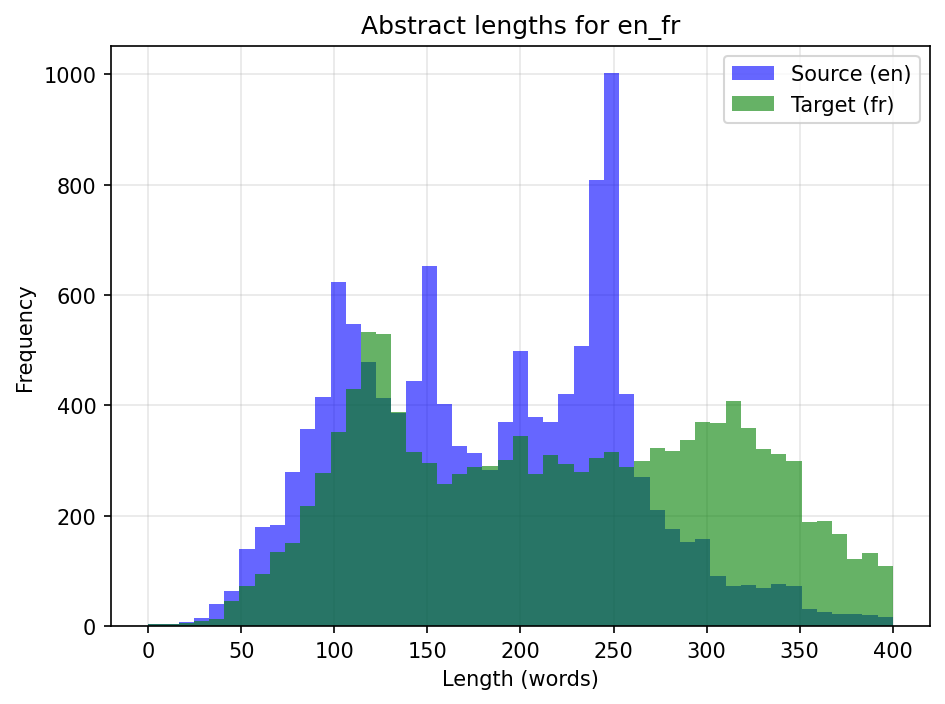

 50%|█████     | 3/6 [01:12<01:12, 24.21s/it]

Processing language pair: en_it
en_it: 2493 document pairs


100%|██████████| 2493/2493 [00:03<00:00, 822.91it/s]


Percentage of sentence pairs with lengths <= 300: 81.51%
Percentage of sentence pairs with lengths <= 400: 96.07%
Percentage of sentence pairs with lengths <= 500: 98.72%
Max source length: 1386
Max target length: 1313
Min source length: 10
Min target length: 27
99th percentile source length: 394.15999999999985
99th percentile target length: 516.1599999999999
Mean source length: 202.10 (std: 75.98)
Mean target length: 226.50 (std: 95.07)


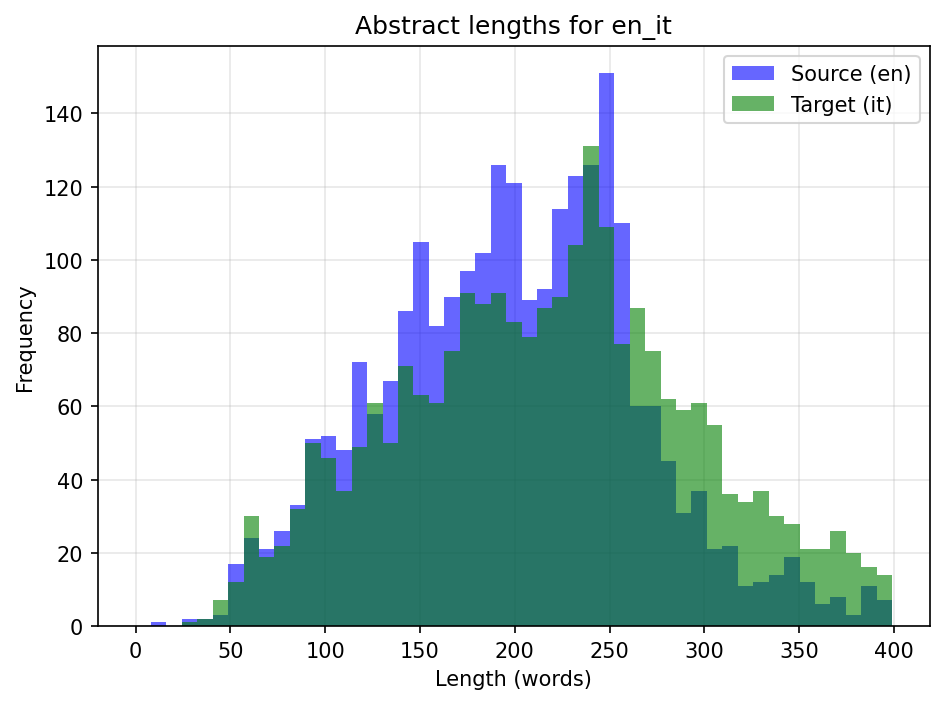

 67%|██████▋   | 4/6 [01:16<00:32, 16.21s/it]

Processing language pair: en_pt
en_pt: 9152 document pairs


100%|██████████| 9152/9152 [00:11<00:00, 792.78it/s]


Percentage of sentence pairs with lengths <= 300: 94.64%
Percentage of sentence pairs with lengths <= 400: 99.51%
Percentage of sentence pairs with lengths <= 500: 99.88%
Max source length: 804
Max target length: 931
Min source length: 20
Min target length: 22
99th percentile source length: 338.4899999999998
99th percentile target length: 365.4899999999998
Mean source length: 194.70 (std: 56.79)
Mean target length: 204.35 (std: 62.60)


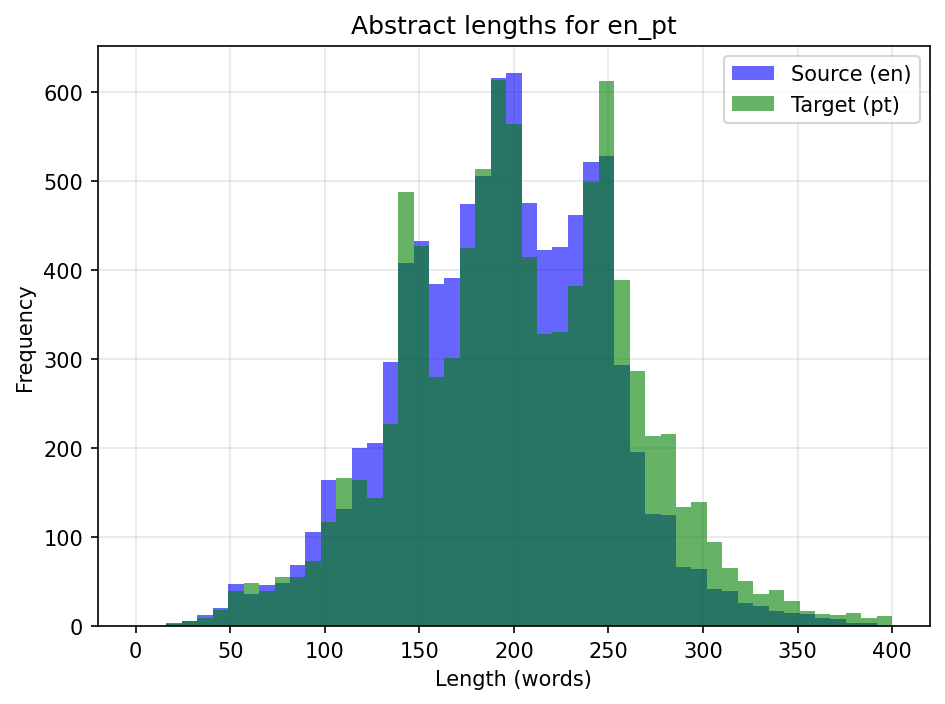

 83%|████████▎ | 5/6 [01:30<00:15, 15.53s/it]

Processing language pair: en_ru
en_ru: 11151 document pairs


100%|██████████| 11151/11151 [00:13<00:00, 802.13it/s]


Percentage of sentence pairs with lengths <= 300: 91.00%
Percentage of sentence pairs with lengths <= 400: 97.96%
Percentage of sentence pairs with lengths <= 500: 99.60%
Max source length: 831
Max target length: 825
Min source length: 8
Min target length: 7
99th percentile source length: 444.5
99th percentile target length: 368.0
Mean source length: 178.34 (std: 90.10)
Mean target length: 154.07 (std: 80.52)


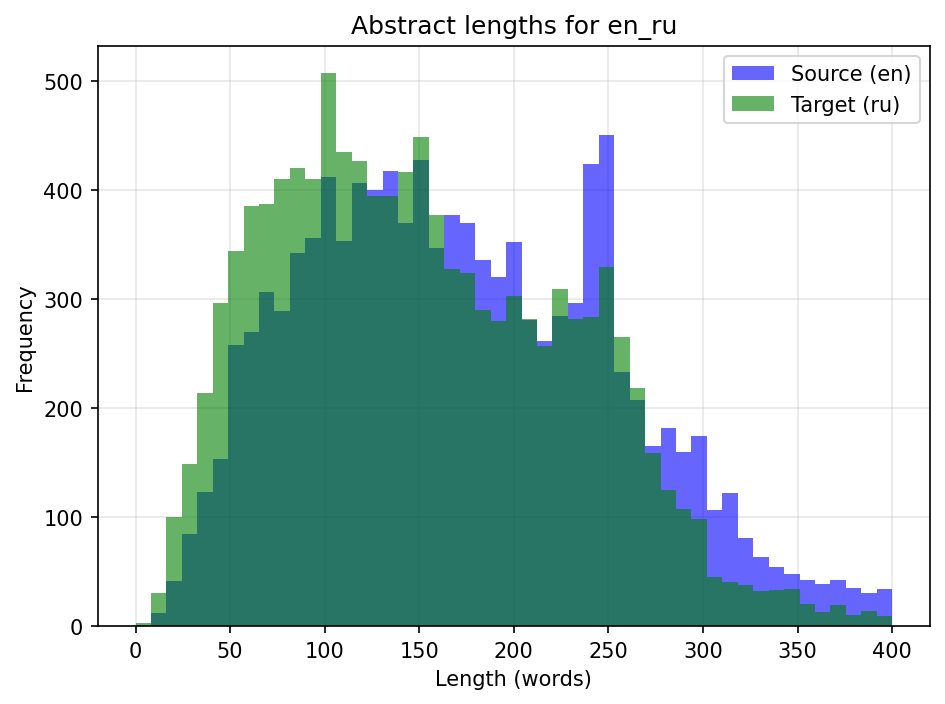

100%|██████████| 6/6 [01:48<00:00, 18.01s/it]


In [5]:
for language_pair in tqdm(LANGUAGE_PAIRS):
    get_pair_info(language_pair)

# # combine all images in SAVE_IMAGES_PATH into a single PNG
# images = [Image.open(SAVE_IMAGES_PATH / img) for img in SAVE_IMAGES_PATH.iterdir() if img.suffix == ".png"]
# widths, heights = zip(*(i.size for i in images))
# total_width = sum(widths)
# max_height = max(heights)

# # create a new image with the combined size
# combined = Image.new("RGB", (total_width, max_height))

# # paste each image into the combined image
# x_offset = 0
# for img in images:
#     combined.paste(img, (x_offset, 0))
#     x_offset += img.width

# # save the combined image
# combined.save(SAVE_IMAGES_PATH / "combined.png")